# Mushroom Classification and Creating a General Guideline

The objective is to create a predictive model in order to classify edible and poisonous mushrooms. We also have to create a general guideline for features that are important to consider for future references.

**Note**: There is no simple rule for determining the edibility of a mushroom. This project is an attempt to explore different mushroom attributes to try to come up with a hypothetical general guideline (the dataset includes hypothetical samples).

Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [2]:
df = pd.read_csv('./mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# see any missing data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

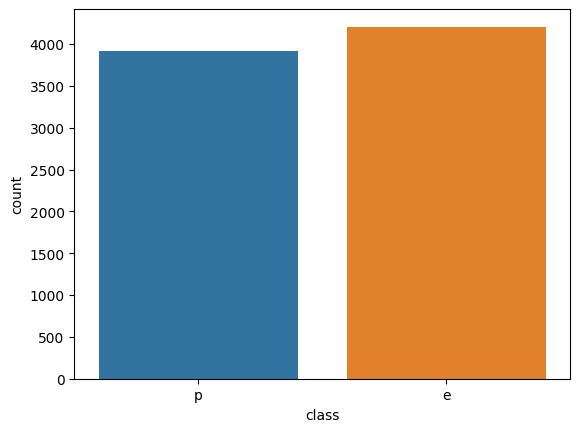

In [69]:
# graph to see any class imbalance
sns.countplot(data=df, x='class')

In [9]:
df.describe().transpose().sort_values('unique')

,count,unique,top,freq
veil-type,8124,1,p,8124
class,8124,2,e,4208
bruises,8124,2,f,4748
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
stalk-shape,8124,2,t,4608
ring-number,8124,3,o,7488
cap-surface,8124,4,y,3244
veil-color,8124,4,w,7924


#### Feature Consideration for Discerning Mushrooms
In order to create a guideline for discerning mushrooms, we should to consider features that don't have a lot of unique values/ labels. Considering features with few unique values will allow easy classification for the mushroom picker/ gatherer.

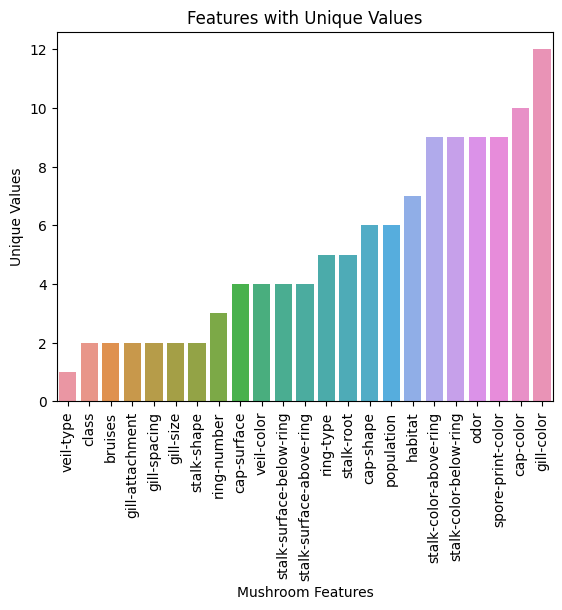

In [12]:
feat_imp = df.describe().transpose().reset_index().sort_values('unique')

sns.barplot(data=feat_imp, x='index', y='unique')
plt.title('Features with Unique Values')
plt.xlabel('Mushroom Features')
plt.xticks(rotation=90)
plt.ylabel('Unique Values')
plt.show()

## Method 1: Decision Tree Classifier with AdaBoosting

Decision Trees are good at explaining feature importance which is desireable in our case. We will also use AdaBoosting to improve model performance and feature selection.

### Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [4]:
print(f"Total input/ features: {len(X.columns)}")

Total input/ features: 95


#### Training the model with different estimators to observe the optimal performance and select best features.

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

error = []
for i in range(1, len(X.columns)+1):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    error_ = 1 - accuracy_score(y_test, pred)
    error.append(error_)

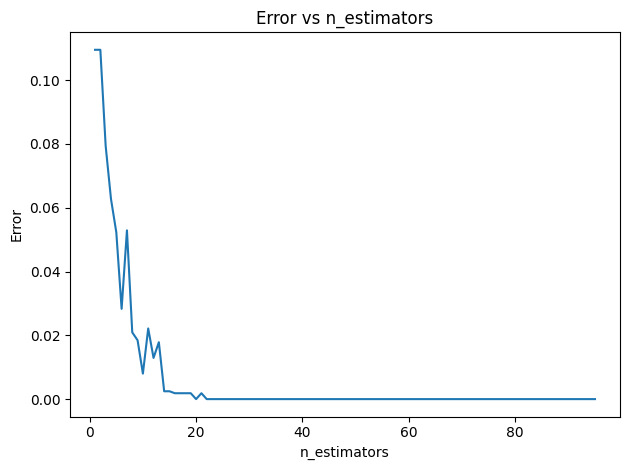

In [25]:
plt.plot(range(1, 96), error)
plt.title('Error vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.tight_layout()

#### Graph Result
There is no significant improvement in model performance in terms of accuracy after selecting 18 weak estimators (Decision Tree Stumps) for AdaBoostClassifier. Therefore we will limit n_estimators = 18 and retrain the model on it.

In [50]:
from sklearn.metrics import classification_report

model = AdaBoostClassifier(n_estimators=18)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(f"{' '*18}{'*'*3} Classification Report {'*'*3}\n{classification_report(y_test, pred)}")

                  *** Classification Report ***
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       840
           p       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



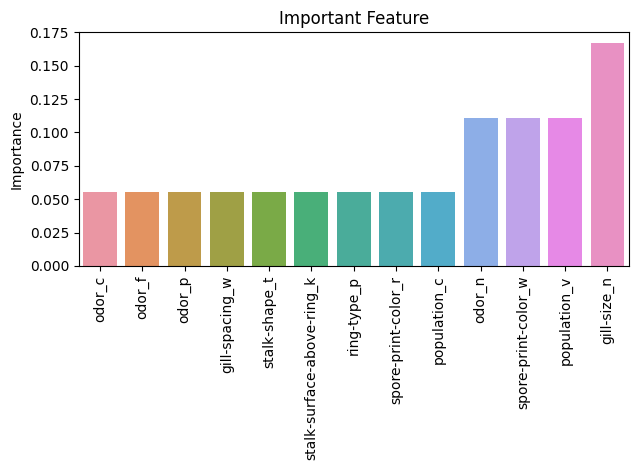

In [43]:
# get significant features in sorted order
sig_feat = pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['Importance']).query('Importance > 0').sort_values('Importance')

# plot the important feature
sns.barplot(data=sig_feat, x=sig_feat.index, y='Importance')
plt.xticks(rotation=90)
plt.title('Important Feature')
plt.tight_layout()
plt.show()

### Result
The graph displays the important features which can serve as a general guideline for people picking mushrooms. They can consider these feature unique values more closely as compare to other traits.
For-example, we can look at 'odor' and based 'odor_n' (i.e, if a mushroom has no odor) and use that for classifying edible mushrooms.

Below graphs show some important features and their unique value counts given the output/ label 'class' ('e' eible/ 'p' poisonous)

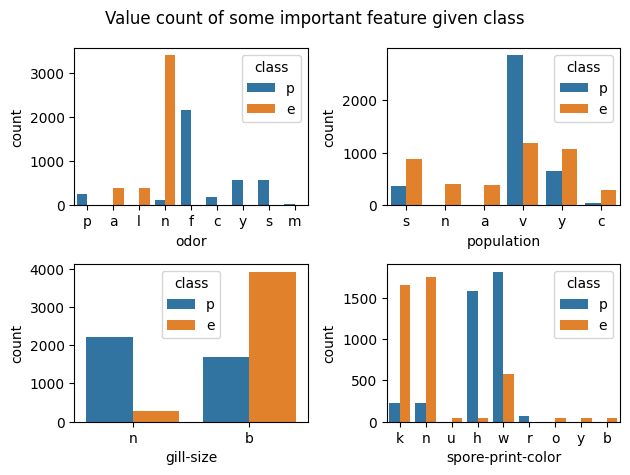

In [67]:
# graph: value count of some imp feat given class
fig, ax = plt.subplots(nrows=2, ncols=2)

sns.countplot(data=df, x='odor', hue='class', ax=ax[0][0])
sns.countplot(data=df, x='population', hue='class', ax=ax[0][1])
sns.countplot(data=df, x='gill-size', hue='class', ax=ax[1][0])
sns.countplot(data=df, x='spore-print-color', hue='class', ax=ax[1][1])

fig.suptitle('Value count of some important feature given class')
plt.tight_layout()
plt.show()

## Method 2: Gradient Boosting with Grid Search

Using Gradient Boosting Classifier with Grid Search for optimal model performance and hyper-parameter selection for mushroom class prediction.

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

base_model = GradientBoostingClassifier()

param_grid = {'n_estimators': [1,5,10,40,100],
              'learning_rate': [0.01, 0.1, 0.2, 1],
              'max_depth': [3,4,5,6]}

# grid search
grid_model = GridSearchCV(base_model, param_grid)

# train
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 40, 100]})

In [9]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

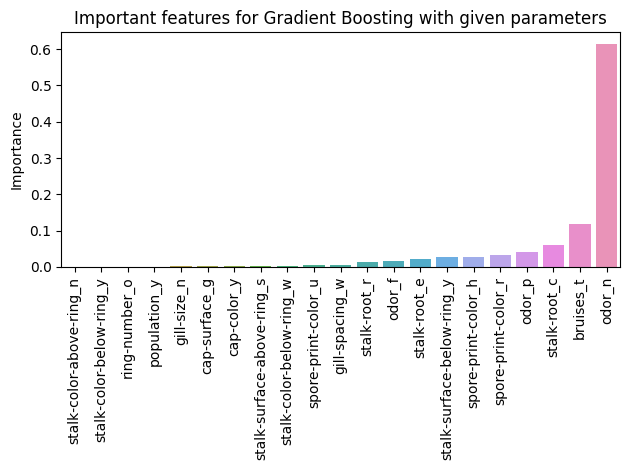

In [14]:
# get important features
feat_imp = pd.DataFrame(data=grid_model.best_estimator_.feature_importances_, index=X.columns, columns=['Importance']).query('Importance > 0.0005').sort_values('Importance')

# plot
sns.barplot(data=feat_imp, x=feat_imp.index, y='Importance')
plt.xticks(rotation=90)
plt.title('Important features for Gradient Boosting with given parameters')
plt.tight_layout()
plt.show()

In [15]:
# predictions
pred = grid_model.predict(X_test)

# report
print(f"{' '*18}{'*'*3} Classification Report {'*'*3}\n{classification_report(y_test, pred)}")

                  *** Classification Report ***
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       840
           p       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Final Result / General Guideline

Based on the two methods used and observed features importances, following is a small guideline (based off two most important features) that can be used when mushroom picking:

1. Odor: Mushroom smell is a good indicator for edible/ poisonous mushrooms. Look for the absence of any smell in mushroom, if there is no odor, there is a high probability that the mushroom is edible.
2. Spore Print Colors: Look for white, chocolate-color and red spore print colors. Presence of either colors indicate that mushroom might be poisonous.